## Fetching the data

In [78]:
import numpy as np
import pandas as pd

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

In [79]:
lines = pd.read_csv('out_data.txt').to_numpy()

t = lines[0::4].astype(float)
a_1 = lines[1::4]
a_2 = lines[2::4]
N_particles = lines[3::4].astype(int)

mxv_1 = np.array([x.split(' ') for x in a_1.ravel()],dtype=float)
mxv_2 = np.array([x.split(' ') for x in a_2.ravel()],dtype=float)

print(t.shape)
#print(mxv_1)
#print(mxv_2)
#print(N_particles)

(100, 1)


Now i will reshape mxv_1 and 2 to get the arrays of mass, position and velocity and i will define the two masses as dictionaries.

In [80]:
m_1 = {
    "m": mxv_1[:,0],
    "x": mxv_1[:,1:4][:,0],
    "y": mxv_1[:,1:4][:,1],
    "z": mxv_1[:,1:4][:,2],
    "pos": mxv_1[:,1:4],
    "v_x": mxv_1[:,4:8][:,0],
    "v_y": mxv_1[:,4:8][:,1],
    "v_z": mxv_1[:,4:8][:,2],
    "vel": mxv_1[:,4:8]
}

m_2 = {
    "m": mxv_2[:,0],
    "x": mxv_2[:,1:4][:,0],
    "y": mxv_2[:,1:4][:,1],
    "z": mxv_2[:,1:4][:,2],
    "pos": mxv_2[:,1:4],
    "v_x": mxv_2[:,4:8][:,0],
    "v_y": mxv_2[:,4:8][:,1],
    "v_z": mxv_2[:,4:8][:,2],
    "vel": mxv_2[:,4:8]
}

#print(m_1["z"])

## Results

In [81]:
import numpy as np
import matplotlib.pyplot as plt

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

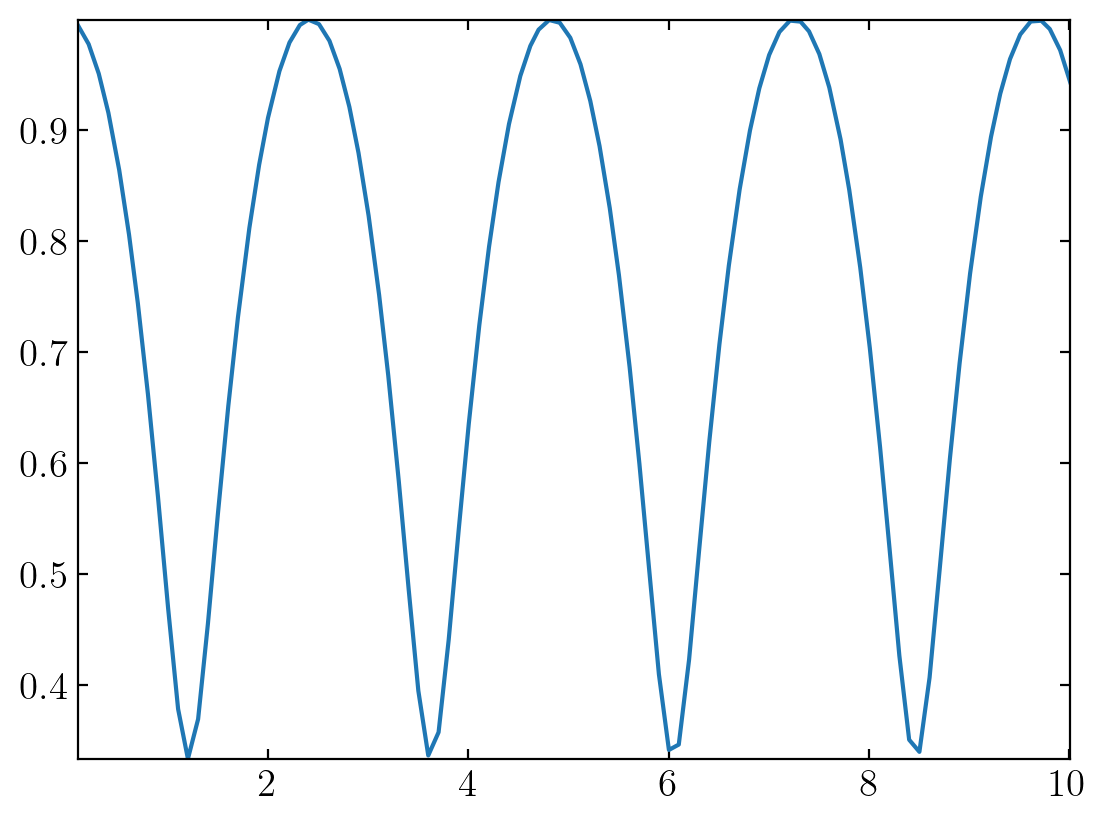

In [82]:
# plotting the distance
def dist(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2 + (z1 - z2)**2)

plt.plot(t, dist(m_1['x'], m_1['y'], m_1['z'], m_2['x'], m_2['y'], m_2['z']));

## Trajectories

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

#config plot
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=True)
%config InlineBackend.figure_format='retina'

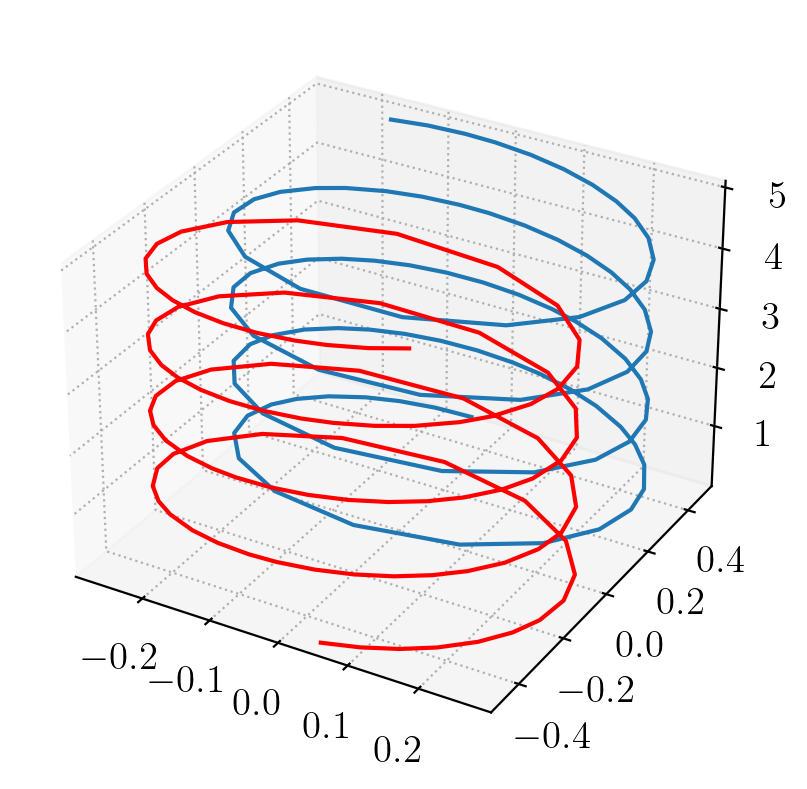

In [84]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(m_1["x"], m_1["y"], m_1["z"], zdir='z', label='curve in (x, y)')
ax.plot(m_2["x"], m_2["y"], m_2["z"], zdir='z', label='curve in (x, y)', color = 'red')

In [85]:
x_1 = m_1["x"]
y_1 = m_1["y"]
z_1 = m_1["z"]

x_2 = m_2["x"]
y_2 = m_2["y"]
z_2 = m_2["z"]

numDataPoints = len(t)

In [86]:
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(x_1[:num+1], y_1[:num+1], 
              z_1[:num+1], c='blue')    # Updating Point Location
    ax.plot3D(x_2[:num+1], y_2[:num+1], 
              z_2[:num+1], c='red')
    ax.scatter(x_1[num], y_1[num], z_1[num], 
               c='blue', marker='o')    # Adding Constant Origin
    ax.scatter(x_2[num], y_2[num], z_2[num], 
               c='blue', marker='o')    # Adding Constant Origin
    ax.plot3D(x_1[0], y_1[0], z_1[0],     
               c='black', marker='o')    # Setting Axes Limits
    ax.set_xlim3d([-.5, .5])
    ax.set_ylim3d([-.5, .5])
    ax.set_zlim3d([0, 100])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [88]:
# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, animate_func, interval=len(t),   
                                   frames=numDataPoints)

# Saving the Animation
f = r"animate_func.gif"
writergif = animation.PillowWriter(fps=60)
line_ani.save(f, writer=writergif)

plt.show()

IndexError: index out of range

IndexError: index out of range

<Figure size 640x480 with 1 Axes>